# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 node802

In [ ]:
!conda env list

## compare the of csv and hdf files

In [4]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Zincscore_caspyrus_10k/results/LED_BB_Q99685_ZINC_caspyrus_10k_FULL_MODEL_results.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,0.855335,False,9,10,9,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",OC(F)(F)F,led3;led3;led3;led3;led3;led3;led3;led3;led3;N...,{'uspto': 6927},"{'expansion_calls': 6068, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553..."
1,O=CC12CN3C(=O)C(COC(Cl)(C(F)(F)F)C(F)(F)F)N1NC...,900.535685,0.000000,0,5690,10,29,1180,0,0.791790,False,10,6,5,"CI, CI, CC(C)(C)[Si](C)(C)Cl, CC(C)(C)[Si](C)(...",CC(=O)SC=CC1=CC2COC3(C(O)O)CN2C(=O)C(COC(Cl)(C...,led3;led3;led3;led3;Not in stock;led3,{'uspto': 5689},"{'expansion_calls': 4529, 'reactants_generatio...","0.7918, 0.7918, 0.7918, 0.7918, 0.7918"
2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2ccccc2Cl)CC1,0.607001,0.606936,1,7,6,1,1,1,0.955960,True,6,6,6,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",NaN,led3;led3;led3;led3;led3;led3,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.7734, 0.7375, 0.6810, 0.6774"
3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,0.950335,True,9,6,6,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",NaN,led3;led3;led3;led3;led3;led3,{'uspto': 9},"{'expansion_calls': 9, 'reactants_generations'...","0.9503, 0.7926, 0.7660, 0.7624, 0.7491"
4,O=C(O)N(C1CCOCOc2ccc(cc2Cl)C1)C(C(F)(F)F)C(F)(F)F,900.721511,0.000000,0,6537,10,27,1623,0,0.831585,False,9,8,7,"O=C(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1Cl, CC(C)(...",[N-]=[N+]=NC1CCOCOc2ccc(c(N)c2)C1,led3;led3;led3;led3;led3;led3;led3;Not in stock,{'uspto': 6536},"{'expansion_calls': 4923, 'reactants_generatio...","0.8316, 0.8314, 0.8167, 0.8167, 0.8152, 0.8152..."


In [5]:
from multiretro.utils.io import DataReader
from multiretro.routeplanning.logic.evaluation.route_evaluation import *
from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [6]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Zincscore_caspyrus_10k/results/LED_BB_Q99685_ZINC_caspyrus_10k_FULL_MODEL_results.csv_0_.hdf", "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Zincscore_caspyrus_10k/results/LED_BB_Q99685_ZINC_caspyrus_10k_FULL_MODEL_results.csv_1_.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees'],
      dtype='object')


<PATH>/1246995/ipykernel_104089/1801331223.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_df = joined_df.append(data_hdf)


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,...,9,10,9,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",OC(F)(F)F,led3;led3;led3;led3;led3;led3;led3;led3;led3;N...,{'uspto': 6927},"{'expansion_calls': 6068, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,1,O=CC12CN3C(=O)C(COC(Cl)(C(F)(F)F)C(F)(F)F)N1NC...,900.535685,0.000000,0,5690,10,29,1180,0,...,10,6,5,"CI, CI, CC(C)(C)[Si](C)(C)Cl, CC(C)(C)[Si](C)(...",CC(=O)SC=CC1=CC2COC3(C(O)O)CN2C(=O)C(COC(Cl)(C...,led3;led3;led3;led3;Not in stock;led3,{'uspto': 5689},"{'expansion_calls': 4529, 'reactants_generatio...","0.7918, 0.7918, 0.7918, 0.7918, 0.7918","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2ccccc2Cl)CC1,0.607001,0.606936,1,7,6,1,1,1,...,6,6,6,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3;led3,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.7734, 0.7375, 0.6810, 0.6774","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,...,9,6,6,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3;led3,{'uspto': 9},"{'expansion_calls': 9, 'reactants_generations'...","0.9503, 0.7926, 0.7660, 0.7624, 0.7491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,O=C(O)N(C1CCOCOc2ccc(cc2Cl)C1)C(C(F)(F)F)C(F)(F)F,900.721511,0.000000,0,6537,10,27,1623,0,...,9,8,7,"O=C(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1Cl, CC(C)(...",[N-]=[N+]=NC1CCOCOc2ccc(c(N)c2)C1,led3;led3;led3;led3;led3;led3;led3;Not in stock,{'uspto': 6536},"{'expansion_calls': 4923, 'reactants_generatio...","0.8316, 0.8314, 0.8167, 0.8167, 0.8152, 0.8152...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [7]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
#hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,...,9,10,9,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",OC(F)(F)F,led3;led3;led3;led3;led3;led3;led3;led3;led3;N...,{'uspto': 6927},"{'expansion_calls': 6068, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,1,O=CC12CN3C(=O)C(COC(Cl)(C(F)(F)F)C(F)(F)F)N1NC...,900.535685,0.000000,0,5690,10,29,1180,0,...,10,6,5,"CI, CI, CC(C)(C)[Si](C)(C)Cl, CC(C)(C)[Si](C)(...",CC(=O)SC=CC1=CC2COC3(C(O)O)CN2C(=O)C(COC(Cl)(C...,led3;led3;led3;led3;Not in stock;led3,{'uspto': 5689},"{'expansion_calls': 4529, 'reactants_generatio...","0.7918, 0.7918, 0.7918, 0.7918, 0.7918","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2ccccc2Cl)CC1,0.607001,0.606936,1,7,6,1,1,1,...,6,6,6,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3;led3,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.7734, 0.7375, 0.6810, 0.6774","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,...,9,6,6,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3;led3,{'uspto': 9},"{'expansion_calls': 9, 'reactants_generations'...","0.9503, 0.7926, 0.7660, 0.7624, 0.7491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,O=C(O)N(C1CCOCOc2ccc(cc2Cl)C1)C(C(F)(F)F)C(F)(F)F,900.721511,0.000000,0,6537,10,27,1623,0,...,9,8,7,"O=C(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1Cl, CC(C)(...",[N-]=[N+]=NC1CCOCOc2ccc(c(N)c2)C1,led3;led3;led3;led3;led3;led3;led3;Not in stock,{'uspto': 6536},"{'expansion_calls': 4923, 'reactants_generatio...","0.8316, 0.8314, 0.8167, 0.8167, 0.8152, 0.8152...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


## calculate results on full data

In [8]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

35102

In [9]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  35.102


<AxesSubplot:>

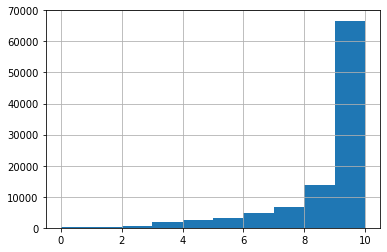

In [10]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

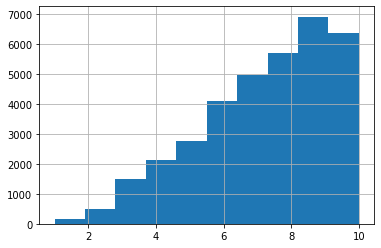

In [11]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [12]:
dataframe_with_values = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/caspyrus10k_zinc/generated_molecules/Q99685_caspyrus10k_zincscore_400ep_final_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,LED3Scorer,XGBClassifier,XGBRegressor,SA,SMILES,clean_smiles,clean_smiles_inchi
0,0.972576,0.909644,6.850926,3.343441,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1..."
1,0.086912,0.779803,6.835841,6.881584,O=CC12CN3C(=O)C(COC(Cl)(C(F)(F)F)C(F)(F)F)N1NC...,O=CC12CN3C(=O)C(COC(Cl)(C(F)(F)F)C(F)(F)F)N1NC...,"InChI=1S/C15H14ClF6N3O4S/c16-13(14(17,18)19,15..."
2,0.966147,0.753034,7.608175,2.517348,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2ccccc2Cl)CC1,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2ccccc2Cl)CC1,InChI=1S/C15H14ClF6NO2/c16-11-4-2-1-3-10(11)9-...
3,0.978173,0.939382,7.309288,2.638563,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22..."
4,0.780787,0.588463,6.671269,4.918923,O=C(O)N(C1CCOCOc2ccc(cc2Cl)C1)C(C(F)(F)F)C(F)(F)F,O=C(O)N(C1CCOCOc2ccc(cc2Cl)C1)C(C(F)(F)F)C(F)(F)F,InChI=1S/C15H14ClF6NO4/c16-10-6-8-1-2-11(10)27...


In [13]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

AssertionError: The target column and clean_smiles columns are not the same

In [14]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
12899,9,O=C1C2=C(C3CCN3C(=O)OC(C(F)(F)F)C(F)(F)F)C1=C(...,703.285134,703.285048,544,2897,10,11,588,1,...,10,7,7,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3;led3;led3,{'uspto': 2896},"{'expansion_calls': 2470, 'reactants_generatio...","0.9501, 0.8551, 0.8551, 0.8551, 0.8453, 0.8453...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [15]:
# calculate the inchis for the target column
from rdkit import Chem

def calculate_inchi(smiles):
    mol = Chem.MolFromSmiles(smiles)
    inchi = Chem.MolToInchi(mol)
    return inchi

hdf_results["target_inchi"] = hdf_results["target"].apply(calculate_inchi)

In [16]:
# do a compariosn between the target column and the clean_smiles column on inchi basis because smiles are disambigious
assert (hdf_results["target_inchi"] == dataframe_with_values["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"
hdf_results[hdf_results["target_inchi"] != dataframe_with_values["clean_smiles_inchi"]]
#print the unique length and the normal length of the inchi column
print("The unique length of the inchi column: ", len(hdf_results["target_inchi"].unique()))
print("The normal length of the inchi column: ", len(hdf_results["target_inchi"]))

print("No join possible!")

The unique length of the inchi column:  99757
The normal length of the inchi column:  100000
No join possible!


In [17]:
# add the dataframe_with_values to the hdf_results for the columns LED3Scorer XGBClassifier	XGBRegressor clean_smiles_inchi
hdf_results["ZincCaspyrus10kScorer"] = dataframe_with_values["LED3Scorer"]
hdf_results["XGBClassifier"] = dataframe_with_values["XGBClassifier"]
hdf_results["XGBRegressor"] = dataframe_with_values["XGBRegressor"]
hdf_results["SA"] = dataframe_with_values["SA"]
hdf_results["clean_smiles_inchi"] = dataframe_with_values["clean_smiles_inchi"]

assert (hdf_results["target_inchi"] == hdf_results["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,policy_used_counts,profiling,top_scores,trees,target_inchi,ZincCaspyrus10kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,...,{'uspto': 6927},"{'expansion_calls': 6068, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1...",0.972576,0.909644,6.850926,3.343441,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1..."
1,1,O=CC12CN3C(=O)C(COC(Cl)(C(F)(F)F)C(F)(F)F)N1NC...,900.535685,0.000000,0,5690,10,29,1180,0,...,{'uspto': 5689},"{'expansion_calls': 4529, 'reactants_generatio...","0.7918, 0.7918, 0.7918, 0.7918, 0.7918","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C15H14ClF6N3O4S/c16-13(14(17,18)19,15...",0.086912,0.779803,6.835841,6.881584,"InChI=1S/C15H14ClF6N3O4S/c16-13(14(17,18)19,15..."
2,2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2ccccc2Cl)CC1,0.607001,0.606936,1,7,6,1,1,1,...,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.7734, 0.7375, 0.6810, 0.6774","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C15H14ClF6NO2/c16-11-4-2-1-3-10(11)9-...,0.966147,0.753034,7.608175,2.517348,InChI=1S/C15H14ClF6NO2/c16-11-4-2-1-3-10(11)9-...
3,3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,...,{'uspto': 9},"{'expansion_calls': 9, 'reactants_generations'...","0.9503, 0.7926, 0.7660, 0.7624, 0.7491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22...",0.978173,0.939382,7.309288,2.638563,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22..."
4,4,O=C(O)N(C1CCOCOc2ccc(cc2Cl)C1)C(C(F)(F)F)C(F)(F)F,900.721511,0.000000,0,6537,10,27,1623,0,...,{'uspto': 6536},"{'expansion_calls': 4923, 'reactants_generatio...","0.8316, 0.8314, 0.8167, 0.8167, 0.8152, 0.8152...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C15H14ClF6NO4/c16-10-6-8-1-2-11(10)27...,0.780787,0.588463,6.671269,4.918923,InChI=1S/C15H14ClF6NO4/c16-10-6-8-1-2-11(10)27...


## confusion matrix

ZincCaspyrus10kScorer SCORER AND LED BUILDING BLOCKS --> EVALUATION IS NOT CORRECT
The accuracy:  0.4952
The precision:  0.40735698105932816
The recall:  0.9631644920517349
The f1 score:  0.5725583837152196
The mcc:  0.2607744367399317


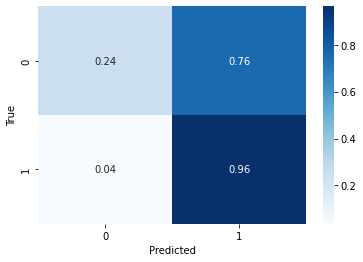

In [18]:
predicted_solved = hdf_results["ZincCaspyrus10kScorer"] > 0.5
solved = hdf_results["is_solved"]

print("ZincCaspyrus10kScorer SCORER AND LED BUILDING BLOCKS --> EVALUATION IS NOT CORRECT")
# calculate the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy: ", accuracy_score(solved, predicted_solved))

# calculate the precision
from sklearn.metrics import precision_score
print("The precision: ", precision_score(solved, predicted_solved))

# calculate the recall
from sklearn.metrics import recall_score
print("The recall: ", recall_score(solved, predicted_solved))

# calculate the f1 score
from sklearn.metrics import f1_score
print("The f1 score: ", f1_score(solved, predicted_solved))

# calculate the mcc
from sklearn.metrics import matthews_corrcoef
print("The mcc: ", matthews_corrcoef(solved, predicted_solved))

# visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# normalized

confusion_matrix = confusion_matrix(solved, predicted_solved)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
## clustering

In [19]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1

2023-03-30 01:36:50.331 | INFO     | multiretro.data.logic.fingerprints.fingerprints:__init__:18 - Fingerprint Binary Morgan Fingerprint with Radius 2 and 1024 bits using Features: False initialized.
<PATH>/conda/envs/multiretro/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [20]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'ZincCaspyrus10kScorer', 'XGBClassifier',
       'XGBRegressor', 'SA', 'clean_smiles_inchi', 'fingerprint',
       'fingerprint_numpy_array', 'x', 'y', 'number_of_steps_marker',
       'real_index'],
      dtype='object')
100000


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,target_inchi,ZincCaspyrus10kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,x,y,number_of_steps_marker,real_index
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,...,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1...",0.972576,0.909644,6.850926,3.343441,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1...",-2.210277,3.594732,7.0,0
1,1,O=CC12CN3C(=O)C(COC(Cl)(C(F)(F)F)C(F)(F)F)N1NC...,900.535685,0.000000,0,5690,10,29,1180,0,...,"InChI=1S/C15H14ClF6N3O4S/c16-13(14(17,18)19,15...",0.086912,0.779803,6.835841,6.881584,"InChI=1S/C15H14ClF6N3O4S/c16-13(14(17,18)19,15...",7.171481,-1.686104,5.0,1
2,2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2ccccc2Cl)CC1,0.607001,0.606936,1,7,6,1,1,1,...,InChI=1S/C15H14ClF6NO2/c16-11-4-2-1-3-10(11)9-...,0.966147,0.753034,7.608175,2.517348,InChI=1S/C15H14ClF6NO2/c16-11-4-2-1-3-10(11)9-...,6.850941,4.651292,13.0,2
3,3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,...,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22...",0.978173,0.939382,7.309288,2.638563,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22...",-1.596679,3.916585,7.0,3
4,4,O=C(O)N(C1CCOCOc2ccc(cc2Cl)C1)C(C(F)(F)F)C(F)(F)F,900.721511,0.000000,0,6537,10,27,1623,0,...,InChI=1S/C15H14ClF6NO4/c16-10-6-8-1-2-11(10)27...,0.780787,0.588463,6.671269,4.918923,InChI=1S/C15H14ClF6NO4/c16-10-6-8-1-2-11(10)27...,9.807536,7.537267,7.0,4


In [22]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/caspyrus10k_zinc/planning_results/led3_building_blocks/LED_BB_Q99685_ZINC_caspyrus_10k_FULL_MODEL_results.csv"
umapDataFrame.to_csv(save_path)

## desired molecules (LED3Chembl200kScorer, XGBClassifier > 0.8)

In [23]:
xgb_molecules = hdf_results[hdf_results["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))

xgb_molecules_solved = xgb_molecules[xgb_molecules["is_solved"] == True]
print("The number of molecules with a XGBClassifier score higher than 0.8 and are solved: ", len(xgb_molecules_solved))

led3_molecules = hdf_results[hdf_results["ZincCaspyrus10kScorer"] > 0.8]
print("The number of molecules with a ZincCaspyrus10kScorer score higher than 0.8: ", len(led3_molecules))
short_list = hdf_results[(hdf_results["ZincCaspyrus10kScorer"] > 0.8) & (hdf_results["XGBClassifier"] > 0.8)]
print("The number of molecules with a ZincCaspyrus10kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8: ", len(short_list))

short_list_solved = short_list[short_list["is_solved"] == True]
print("The number of molecules with a ZincCaspyrus10kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved: ", len(short_list_solved))

The number of molecules with a XGBClassifier score higher than 0.8:  66628
The number of molecules with a XGBClassifier score higher than 0.8 and are solved:  24912
The number of molecules with a ZincCaspyrus10kScorer score higher than 0.8:  66664
The number of molecules with a ZincCaspyrus10kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8:  48338
The number of molecules with a ZincCaspyrus10kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved:  22419


In [24]:
# reset index of shortlist
short_list = short_list.reset_index(drop = True)
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,target_inchi,ZincCaspyrus10kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,...,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1...",0.972576,0.909644,6.850926,3.343441,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[False, True, False, False, False, False, Fals...",-2.210277,3.594732
1,3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,...,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22...",0.978173,0.939382,7.309288,2.638563,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, True, False, False...",-1.596679,3.916585
2,8,O=CCCCCC(=CC=CC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)...,900.686869,0.000000,0,8319,10,21,1321,0,...,"InChI=1S/C21H27F6NO4/c22-20(23,24)18(21(25,26)...",0.864202,0.836017,7.198841,3.980382,"InChI=1S/C21H27F6NO4/c22-20(23,24)18(21(25,26)...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",-2.013254,6.348006
3,9,N#Cc1ccc(F)c(C(=O)N2CCN(C(=O)OC(C(F)(F)F)C(F)(...,1.743096,1.742998,1,11,6,1,1,1,...,InChI=1S/C16H12F7N3O3/c17-11-2-1-9(8-24)7-10(1...,0.996741,0.937108,7.348575,2.643635,InChI=1S/C16H12F7N3O3/c17-11-2-1-9(8-24)7-10(1...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",7.235252,6.761738
4,2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(Oc2ccccc2)CC1,0.089420,0.089356,1,2,1,1,1,1,...,"InChI=1S/C15H15F6NO3/c16-14(17,18)12(15(19,20)...",0.992139,0.897507,7.258475,2.465023,"InChI=1S/C15H15F6NO3/c16-14(17,18)12(15(19,20)...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",3.985587,5.552074


In [25]:
provided_short_list = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/caspyrus10k_zinc/generated_molecules/Q99685_caspyrus10k_zincscore_400ep_final_shortlist.csv"
provided_short_list = pandas.read_csv(provided_short_list)
print(len(provided_short_list))
provided_short_list["clean_smiles_inchi"] = provided_short_list["SMILES"].apply(calculate_inchi)
provided_short_list.head()

48338


,SMILES,LED3Scorer,XGBClassifier,XGBRegressor,SA,closest_training_molecule_similarity,closest_training_molecule,clean_smiles_inchi
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,0.972576,0.909644,6.850926,3.343441,0.318182,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CNS(=O)(=O)c2cc...,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1..."
1,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.978173,0.939382,7.309288,2.638563,0.385542,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CNS(=O)(=O)c2cc...,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22..."
2,O=CCCCCC(=CC=CC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)...,0.864202,0.836017,7.198841,3.980382,0.294118,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2nn(-c3ccccc3)...,"InChI=1S/C21H27F6NO4/c22-20(23,24)18(21(25,26)..."
3,N#Cc1ccc(F)c(C(=O)N2CCN(C(=O)OC(C(F)(F)F)C(F)(...,0.996741,0.937108,7.348575,2.643635,0.407895,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,InChI=1S/C16H12F7N3O3/c17-11-2-1-9(8-24)7-10(1...
4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(Oc2ccccc2)CC1,0.992139,0.897507,7.258475,2.465023,0.460526,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2nn(-c3ccccc3)...,"InChI=1S/C15H15F6NO3/c16-14(17,18)12(15(19,20)..."


In [26]:
# assert that the short_list and provided_short_list are the same target_inchi and clean_smiles_inchi
assert (short_list["target_inchi"] == provided_short_list["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

In [27]:
short_list["closest_training_molecule_similarity"] = provided_short_list["closest_training_molecule_similarity"]
short_list["closest_training_molecule"] = provided_short_list["closest_training_molecule"]
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,...,0.909644,6.850926,3.343441,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[False, True, False, False, False, False, Fals...",-2.210277,3.594732,0.318182,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CNS(=O)(=O)c2cc...
1,3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,...,0.939382,7.309288,2.638563,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, True, False, False...",-1.596679,3.916585,0.385542,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CNS(=O)(=O)c2cc...
2,8,O=CCCCCC(=CC=CC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)...,900.686869,0.000000,0,8319,10,21,1321,0,...,0.836017,7.198841,3.980382,"InChI=1S/C21H27F6NO4/c22-20(23,24)18(21(25,26)...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",-2.013254,6.348006,0.294118,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2nn(-c3ccccc3)...
3,9,N#Cc1ccc(F)c(C(=O)N2CCN(C(=O)OC(C(F)(F)F)C(F)(...,1.743096,1.742998,1,11,6,1,1,1,...,0.937108,7.348575,2.643635,InChI=1S/C16H12F7N3O3/c17-11-2-1-9(8-24)7-10(1...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",7.235252,6.761738,0.407895,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1
4,2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(Oc2ccccc2)CC1,0.089420,0.089356,1,2,1,1,1,1,...,0.897507,7.258475,2.465023,"InChI=1S/C15H15F6NO3/c16-14(17,18)12(15(19,20)...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",3.985587,5.552074,0.460526,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2nn(-c3ccccc3)...


In [28]:
# print the number of molecules in the short list
print("The number of molecules in the short list: ", len(short_list))

# get the number of molecules in the short list that are solved
print("The number of molecules in the short list that are solved:", len(short_list[short_list["is_solved"] == True]))

# percentage of solved molecules in the short list
print("The percentage of solved molecules in the short list: ", len(short_list[short_list["is_solved"] == True]) / len(short_list))

The number of molecules in the short list:  48338
The number of molecules in the short list that are solved: 22419
The percentage of solved molecules in the short list:  0.463796598949067


<AxesSubplot:>

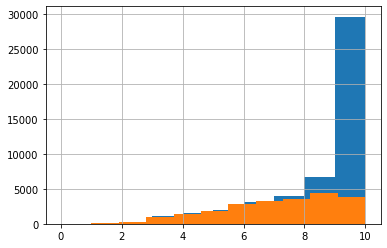

In [29]:
# hist of the number of steps for the short list
short_list["number_of_steps"].hist()

# hist in the short list that are solved
short_list[short_list["is_solved"] == True]["number_of_steps"].hist()

<AxesSubplot:>

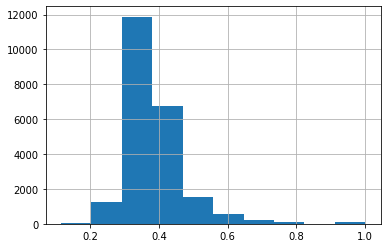

In [30]:
short_list[short_list["is_solved"] == True]["closest_training_molecule_similarity"].hist()

In [31]:
# solved and tanimoto similarity < 0.6

short_list["solved_and_unique"] = short_list["is_solved"] & (short_list["closest_training_molecule_similarity"] < 0.6)

# get index 9779 row
short_list[short_list.index == 9779]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique
9779,8,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(CCC=Cc2ccccc2)CC1,0.399156,0.399054,1,5,4,1,1,1,...,7.405221,2.607195,"InChI=1S/C18H20F6N2O2/c19-17(20,21)15(18(22,23...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",1.594354,8.154424,0.445946,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,True


## umap clustering

In [32]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = short_list, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "solved_and_unique", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor", "closest_training_molecule_similarity", "closest_training_molecule"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1


2023-03-30 01:46:50.973 | INFO     | multiretro.data.logic.fingerprints.fingerprints:__init__:18 - Fingerprint Binary Morgan Fingerprint with Radius 2 and 1024 bits using Features: False initialized.
<PATH>/conda/envs/multiretro/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [33]:
print(umapDataFrame.columns)

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'ZincCaspyrus10kScorer', 'XGBClassifier',
       'XGBRegressor', 'SA', 'clean_smiles_inchi', 'fingerprint',
       'fingerprint_numpy_array', 'x', 'y',
       'closest_training_molecule_similarity', 'closest_training_molecule',
       'solved_and_unique', 'number_of_steps_marker', 'real_index'],
      dtype='object')


In [34]:
print(umapDataFrame.columns)

# remove 'trees', 'molecule_results', 'fingerprint', 'fingerprint_numpy_array', columns
umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])

umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'ZincCaspyrus10kScorer', 'XGBClassifier',
       'XGBRegressor', 'SA', 'clean_smiles_inchi', 'fingerprint',
       'fingerprint_numpy_array', 'x', 'y',
       'closest_training_molecule_similarity', 'closest_training_molecule',
       'solved_and_unique', 'number_of_steps_marker', 'real_index'],
      dtype='object')


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBRegressor,SA,clean_smiles_inchi,x,y,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique,number_of_steps_marker,real_index
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CCCCOC(F)(F)F)C1,900.369441,0.000000,0,6928,10,32,874,0,...,6.850926,3.343441,"InChI=1S/C13H16F9NO3/c14-11(15,16)9(12(17,18)1...",2.211956,-7.456836,0.318182,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CNS(=O)(=O)c2cc...,False,7.0,0
1,3,O=C(CCCCC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC1)N1...,0.824274,0.824203,1,10,9,1,1,1,...,7.309288,2.638563,"InChI=1S/C17H24F6N2O3/c18-16(19,20)14(17(21,22...",2.134749,-6.675347,0.385542,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(CNS(=O)(=O)c2cc...,True,7.0,1
2,8,O=CCCCCC(=CC=CC1CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)...,900.686869,0.000000,0,8319,10,21,1321,0,...,7.198841,3.980382,"InChI=1S/C21H27F6NO4/c22-20(23,24)18(21(25,26)...",4.614952,-5.462513,0.294118,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2nn(-c3ccccc3)...,False,5.0,2
3,9,N#Cc1ccc(F)c(C(=O)N2CCN(C(=O)OC(C(F)(F)F)C(F)(...,1.743096,1.742998,1,11,6,1,1,1,...,7.348575,2.643635,InChI=1S/C16H12F7N3O3/c17-11-2-1-9(8-24)7-10(1...,-0.446128,3.474012,0.407895,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,True,13.0,3
4,2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(Oc2ccccc2)CC1,0.089420,0.089356,1,2,1,1,1,1,...,7.258475,2.465023,"InChI=1S/C15H15F6NO3/c16-14(17,18)12(15(19,20)...",-4.043434,4.297497,0.460526,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(c2nn(-c3ccccc3)...,True,23.0,4


In [35]:
umapDataFrame.to_csv("<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/caspyrus10k_zinc/planning_results/led3_building_blocks/LED_BB_Q99685_ZINC_caspyrus_10k_FULL_MODEL_results_shortlist.csv")